In [1]:
!pip install numba

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.linalg import hadamard, qr
from scipy.sparse import diags
import time
import numba as nb

from utils import *

from NTDCG1 import NTDCG1
from NTDCG2 import NTDCG2
from NDY import NDY
from NFR import NFR
from SCG1 import SCG1
from SCG2 import SCG2
from TTMHSAB import TTMHSAB

# from FISTA import FISTA
# from MDL import MDL
# from mDFP import mDFP

# Main script -----------------------------------------------------------------
def main(SOLVERS):
    # Problem parameters
    Ameth = 0
    xmeth = 0
    sig1 = 1e-6
    sig2 = sig1
    rho = 0.2
    delta = 0.2

    n = 2**12  # 4096
    m = int(round(delta * n))
    k0 = int(round(rho * m))
    alpha = 0.5
    seed = 0
    full = True

    # Generate problem
    A, b, xs, xsn = getData(m, n, k0, Ameth, xmeth, sigma1=sig1, sigma2=sig2, state=seed)
    M, mu_rec, A, b, sig, kap, tau, M12 = getM_mu(full, m, n, Ameth, A, b, sig1, sig2, alpha)

    if M is not None:
        A = M12 @ A
        b = M12 @ b

    # Calculate psi and set options
    psi = max(2**(-8), 0.001*np.linalg.norm(A.T@b, np.inf))
    lamda = 0.001
    
    options = {
        'init': 1,
        'MaxIter': 20000,
        'NLmax': 15,
        'CRestart': 1e-6,
        'Tolerance': 1e-6,
        'delta': 1e-6,
        # 'delta': 1e-5,
        'sigma': 1e-1,
        # 'sigma': 0.75,
        'xs': xs
    }

    options2 = {
        'init': 1,
        'MaxIter': 20000,
        'NLmax': 15,
        'CRestart': 1e-6,
        'Tolerance': 1e-6,
        'delta': 1e-3,
        # 'sigma': 1e-3,
        'sigma': 0.75,
        'xs': xs
    }

    # Run solvers
    results = {}
    for solver in SOLVERS:
        print(f'Running {solver}...')
        start_time = time.time()
        
        # Call solver function (mDFP in this example)
        n = A.shape[1]
        if solver == 'NTDCG1':
            outp = NTDCG1(n, A, b, lamda, psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
        if solver == 'TTMHSAB':
            outp = TTMHSAB(n, A, b, lamda, psi, 
              options2['init'], options2['xs'], options2['MaxIter'],
              options2['NLmax'], options2['CRestart'], options2['Tolerance'],
              options2['delta'], options2['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }

        if solver == 'NTDCG2':
            outp = NTDCG2(n, A, b, lamda,psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
        if solver == 'NDY':
            outp = NDY(n, A, b, lamda,psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
        if solver == 'NFR':
            outp = NFR(n, A, b, lamda,psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
        if solver == 'SCG1':
            outp = SCG1(n, A, b, lamda,psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
        if solver == 'SCG2':
            outp = SCG2(n, A, b, lamda,psi, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            output = {
                                'x': outp[0],           # xopt
                                'f': outp[1],           # list of fvals
                                'g': outp[2],           # gopt
                                'iterfinal': outp[3],   # NI
                                'nf': outp[4],          # Nf
                                'ng': outp[5],          # Ng
                                'tnf': outp[6],         # TNF
                                'mse': outp[7],         # mse
                                'nz': outp[8],          # nz_x
                                'n2re': outp[9],       # Output_n2re_list (np.array or list)
                                'cpu': -1               # Placeholder CPU time since not computed under @njit
                            }
    # NFR
        if solver == 'FISTA':
            output = FISTA(A, b, lamda, 
              options['init'], options['xs'], options['MaxIter'],
              options['NLmax'], options['CRestart'], options['Tolerance'],
              options['delta'], options['sigma'])
                            #    options)
            # output = {
            #                     'x': outp[0],           # xopt
            #                     'f': outp[1],           # list of fvals
            #                     'g': outp[2],           # gopt
            #                     'iterfinal': outp[3],   # NI
            #                     'nf': outp[4],          # Nf
            #                     'ng': outp[5],          # Ng
            #                     'tnf': outp[6],         # TNF
            #                     'mse': outp[7],         # mse
            #                     'nz': outp[8],          # nz_x
            #                     'n2re': outp[9],       # Output_n2re_list (np.array or list)
            #                     'cpu': -1               # Placeholder CPU time since not computed under @njit
            #                 }
        elapsed = time.time() - start_time
        output['cpu'] = elapsed
        results[solver] = output
        print(f'Completed in {elapsed:.2f} seconds')
    return results, n, m, b, k0, xs, Ameth


In [3]:
import numpy as np
sk=np.array([1,-2,0.1,2])
sk[:]*sk[:]

array([1.  , 4.  , 0.01, 4.  ])

In [3]:
if __name__ == "__main__":
    # SOLVERS = ['CGDESCENT','FISTA','MDL','mDFP']
    SOLVERS = ['NTDCG1','NTDCG2','TTMHS-AB','NDY','NFR','SCG1','SCG2']
    # SOLVERS = ['NTDCG2']
    # SOLVERS=['TTMHSAB']

    results, n, m, b, k0, xs, Ameth = main(SOLVERS)

/Users/mahmoudpd/Downloads/Document-UBUNTU/Engieering and Optim/Signal_rec./utils.py:305: RuntimeWarning: divide by zero encountered in matmul
  b = A @ xsn
/Users/mahmoudpd/Downloads/Document-UBUNTU/Engieering and Optim/Signal_rec./utils.py:305: RuntimeWarning: overflow encountered in matmul
  b = A @ xsn
/Users/mahmoudpd/Downloads/Document-UBUNTU/Engieering and Optim/Signal_rec./utils.py:305: RuntimeWarning: invalid value encountered in matmul
  b = A @ xsn
/var/folders/m0/zls6mb711wjbmvvy6hv0w0jc0000gn/T/ipykernel_28832/2623342529.py:49: RuntimeWarning: divide by zero encountered in matmul
  psi = max(2**(-8), 0.001*np.linalg.norm(A.T@b, np.inf))
/var/folders/m0/zls6mb711wjbmvvy6hv0w0jc0000gn/T/ipykernel_28832/2623342529.py:49: RuntimeWarning: overflow encountered in matmul
  psi = max(2**(-8), 0.001*np.linalg.norm(A.T@b, np.inf))
/var/folders/m0/zls6mb711wjbmvvy6hv0w0jc0000gn/T/ipykernel_28832/2623342529.py:49: RuntimeWarning: invalid value encountered in matmul
  psi = max(2**(-8)

Running NTDCG1...
Completed in 143.25 seconds
Running NTDCG2...
Completed in 31.14 seconds
Running TTMHS-AB...
Completed in 0.00 seconds
Running NDY...
Completed in 34.70 seconds
Running NFR...
Completed in 20.96 seconds
Running SCG1...
Completed in 22.90 seconds
Running SCG2...
Completed in 43.87 seconds


In [ ]:
Running CGDESCENT...
Completed in 59.56 seconds
Running FISTA...
Completed in 346.13 seconds
Running MDL...
Completed in 16.15 seconds
Running mDFP...
Completed in 208.96 seconds
Running TTMHSAB...
Completed in 72.67 seconds

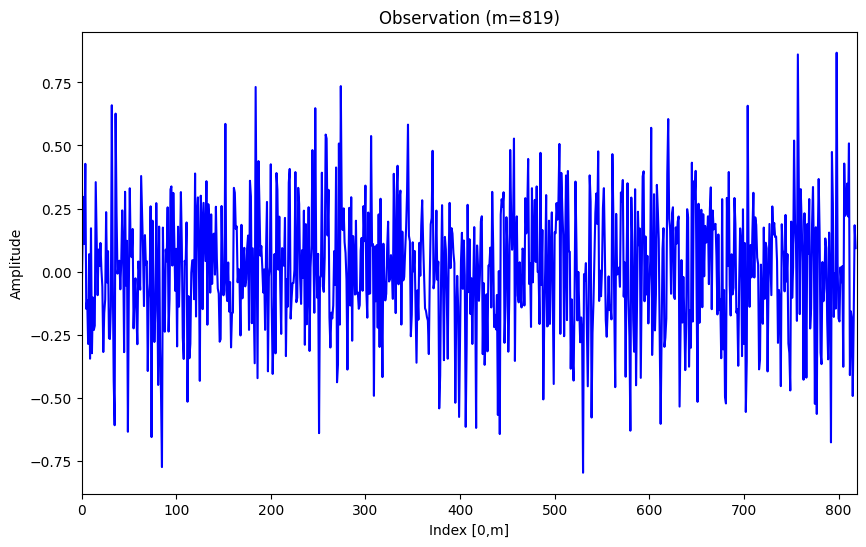

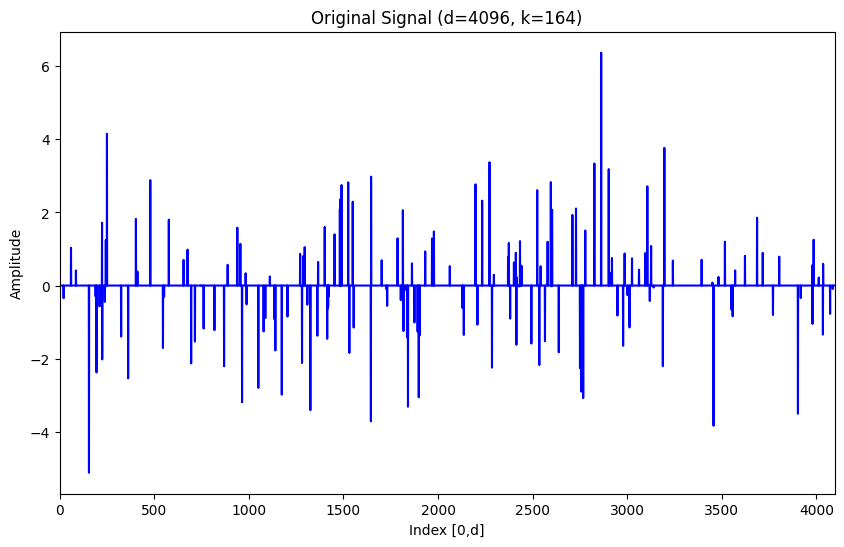

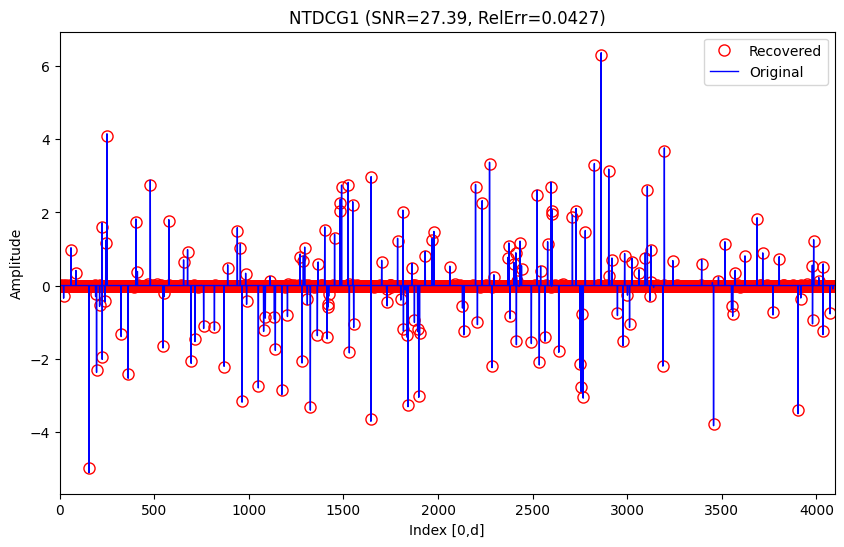

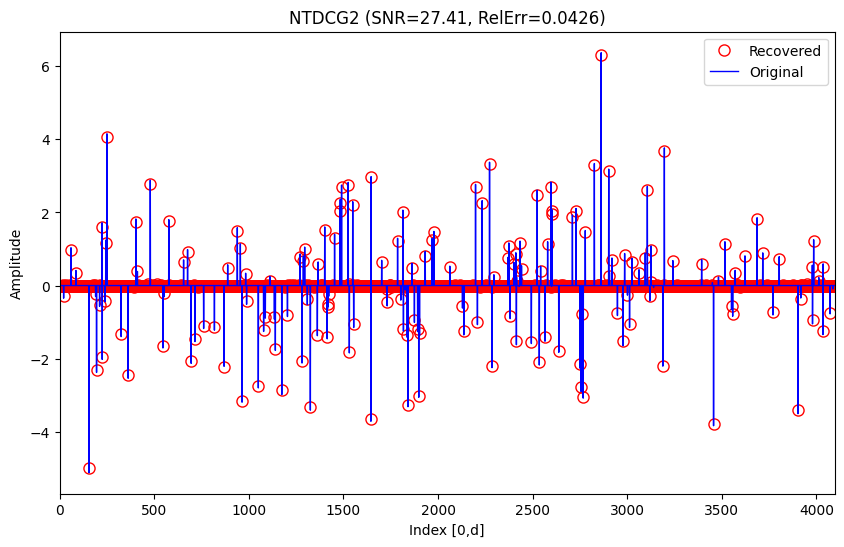

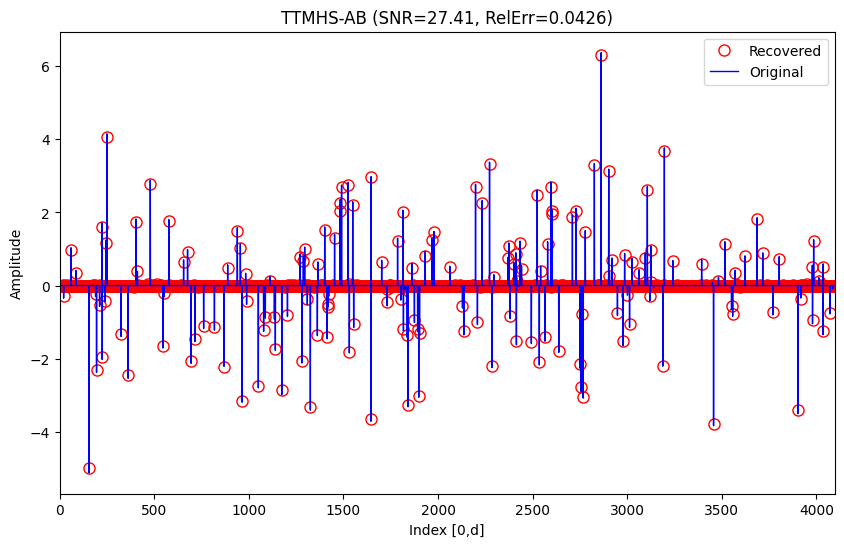

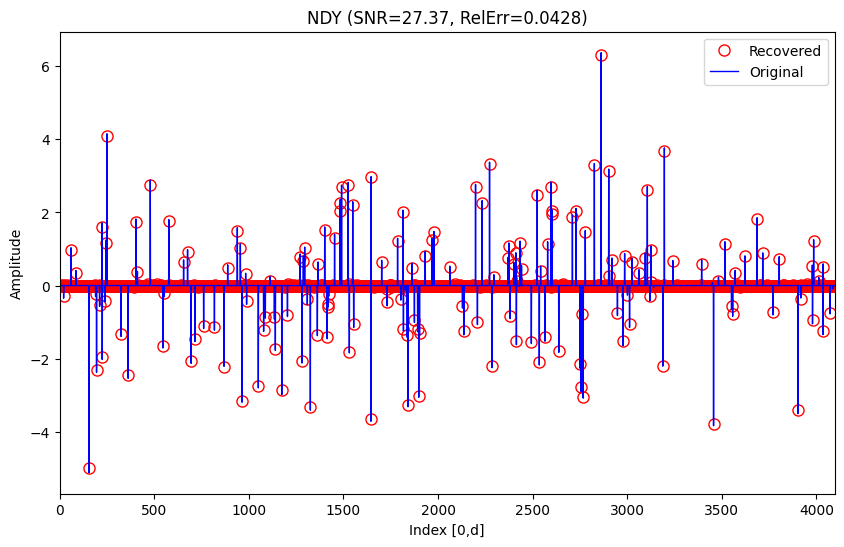

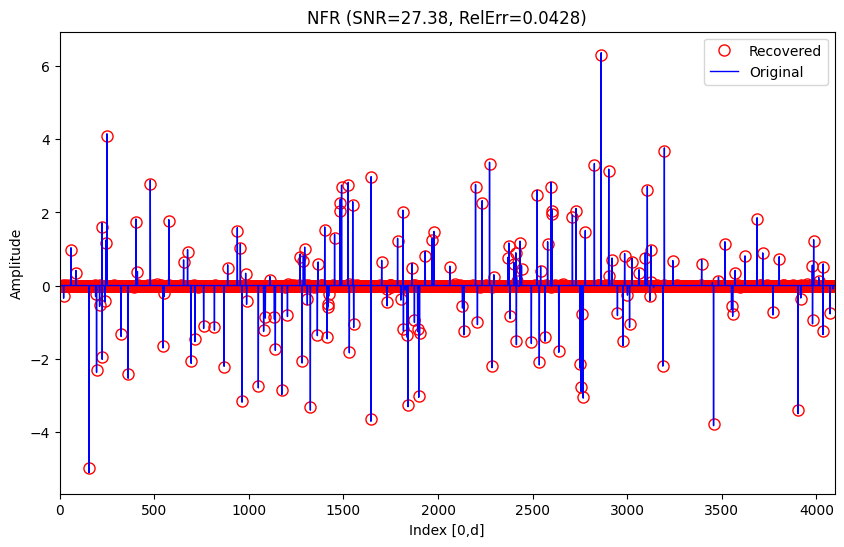

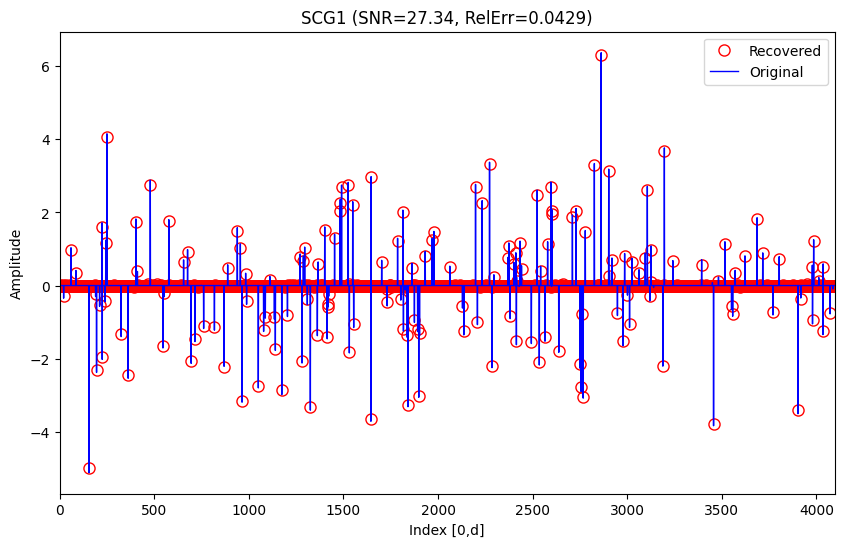

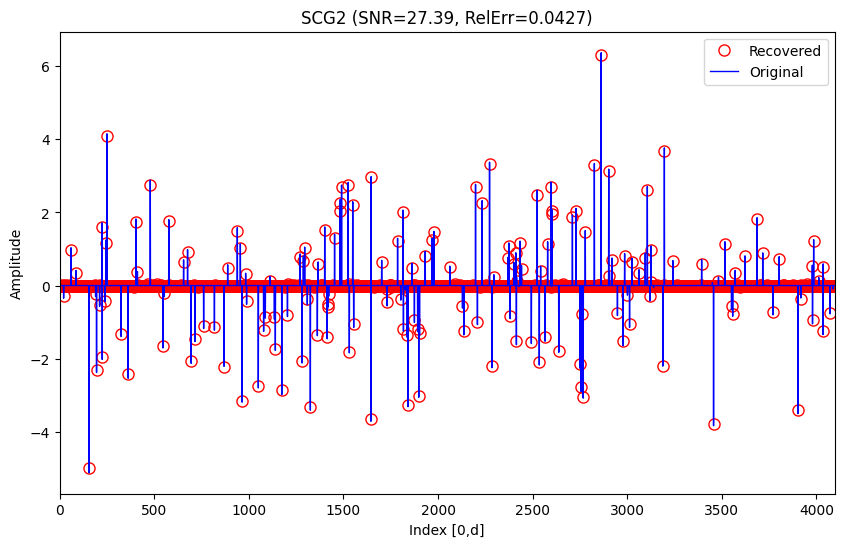

In [4]:
# Slist = 
# Process results for plotting
for solver in SOLVERS:
    output = results[solver]
    
    # Best function value so far
    F = output['f']
    F_best = np.minimum.accumulate(F)
    results[solver]['f_best'] = F_best
    
    # Best relative error so far
    if 'n2re' in output:
        n2re = output['n2re']
        n2re_best = np.minimum.accumulate(n2re)
        results[solver]['n2re_best'] = n2re_best

# Plotting
colors = ['r', 'b', 'g', 'k']
linestyles = ['-', '--', '-.', ':']

# Figure 1: Function values
# plt.figure(figsize=(10, 6))
# for i, solver in enumerate(SOLVERS):
#     F_best = results[solver]['f_best']
#     iterations = np.arange(1, len(F_best)+1)
#     plt.loglog(iterations, F_best, color=colors[i], linestyle=linestyles[i], label=solver)

# plt.xlabel('Iterations')
# plt.ylabel('Function values')
# plt.legend()
# plt.title('Function Value vs Iterations')
# plt.grid(True, which="both", ls="-")
# plt.savefig(f'Figure{Ameth}.1.png')

# Figure 2: Relative error
# plt.figure(figsize=(10, 6))
# for i, solver in enumerate(SOLVERS):
#     if 'n2re_best' in results[solver]:
#         n2re_best = results[solver]['n2re_best']
#         iterations = np.arange(1, len(n2re_best)+1)
#         plt.loglog(iterations, n2re_best, color=colors[i], linestyle=linestyles[i], label=solver)

# plt.xlabel('Iterations')
# plt.ylabel('Relative Error $||x - x_s||/||x_s||$')
# plt.legend()
# plt.title('Relative Error vs Iterations')
# plt.grid(True, which="both", ls="-")
# plt.savefig(f'Figure{Ameth}.2.png')

# Figure 3: Observations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(m), b, 'b')
plt.title(f'Observation (m={m})')
plt.ylabel('Amplitude')
plt.xlabel('Index [0,m]')
plt.xlim((0,m))

# plt.grid(True)
plt.savefig(f'Figure{Ameth}.3.png')

# Figure 4: Original signal
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), xs, 'b')
plt.title(f'Original Signal (d={n}, k={k0})')
plt.ylabel('Amplitude')
plt.xlabel('Index [0,d]')
plt.xlim((0,n))

# plt.grid(True)
plt.savefig(f'Figure{Ameth}.4.png')

# from scipy.signal import find_peaks

# Figures for each solver's solution
for i, solver in enumerate(SOLVERS):
    plt.figure(figsize=(10, 6))
    xsolver = results[solver]['x']
    # rel_err = 100 * np.linalg.norm(xsolver - xs) / np.linalg.norm(xs)
    rel_err = np.linalg.norm(xsolver - xs) / np.linalg.norm(xs)

    signal_power = np.mean(xs**2)
    noise_power = np.mean((xs - xsolver) ** 2)
    snr_val = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else np.finfo(np.float64).max

    # peaks, _ = find_peaks(xsolver)
    # plt.plot(peaks + 1, xsolver[peaks], 'ro', markersize=8, markerfacecolor='none',label='Recovered')
    plt.plot(np.arange(n), xsolver, 'ro', markersize=8,markerfacecolor='none', label='Recovered')
    plt.plot(np.arange(n), xs, 'b', linewidth=1, label='Original')
    plt.title(f'{solver} (SNR={snr_val:.2f}, RelErr={rel_err:.4f})')
    plt.ylabel('Amplitude')
    plt.xlabel('Index [0,d]')
    plt.xlim((0,n))
    plt.legend()
    # plt.grid(True)
    plt.savefig(f'Figure-{solver}.{5+i}.png')

plt.show()


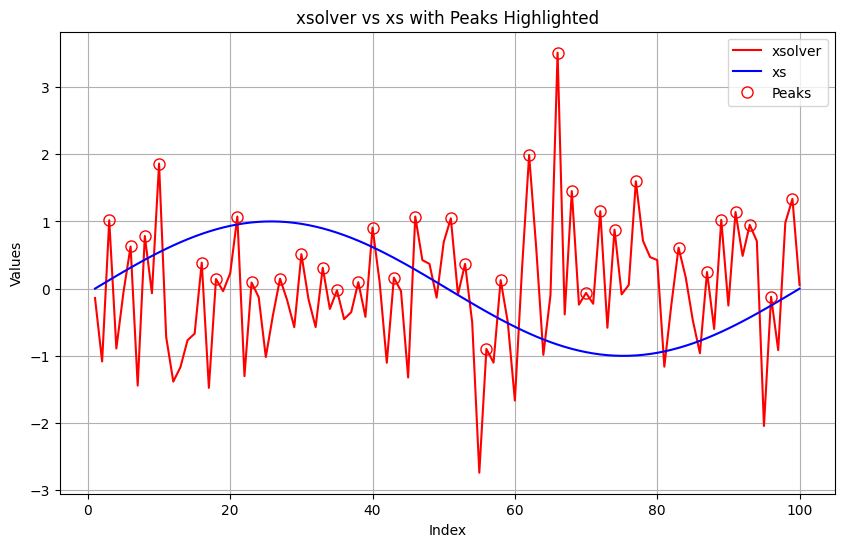

In [7]:
# Sample data (replace with your actual variables)
n = 100
xsolver = np.random.randn(n)
xs = np.sin(np.linspace(0, 2 * np.pi, n))

# Find peaks in xsolver
from scipy.signal import find_peaks
peaks, _ = find_peaks(xsolver)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), xsolver, 'r-', label='xsolver')
plt.plot(range(1, n + 1), xs, 'b-', label='xs')

# Red bubbles on peaks
plt.plot(peaks + 1, xsolver[peaks], 'ro', markersize=8, markerfacecolor='none', label='Peaks')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.title('xsolver vs xs with Peaks Highlighted')
plt.grid(True)
plt.show()
